# 13. 다대일 관계 구현하기
___
## 작성자 추가하기
웹 개발을 하다 보면 각기 다른 정보를 연결해야 할 때가 있다. 예를 들어 웹 사이트에서 A라는 사용자가 여러 포스트를 작성할 경우를 생각해보자. 포스트에 작성자 정보를 담을 필드가 필요하다. 댓글도 마찬가지로 B라는 사용자가 어떤 블로그 포스트에 댓글을 남겼다면 이 댓글이 어떤 포스트에 대한 댓글이고 작성자는 누구인지등의 정보를 담을 필드가 필요하다. 이렇게 정보를 연결하는 방법으로 다대일과 다대다 관계가 있다.
### 다대일 (many to one)관계 이해하기
다대일 관계는 여러개의 모델이 하나의 모델에 연결되는 관계를 말한다. 현제 개발하고 있는 블로그를 떠올려보자.

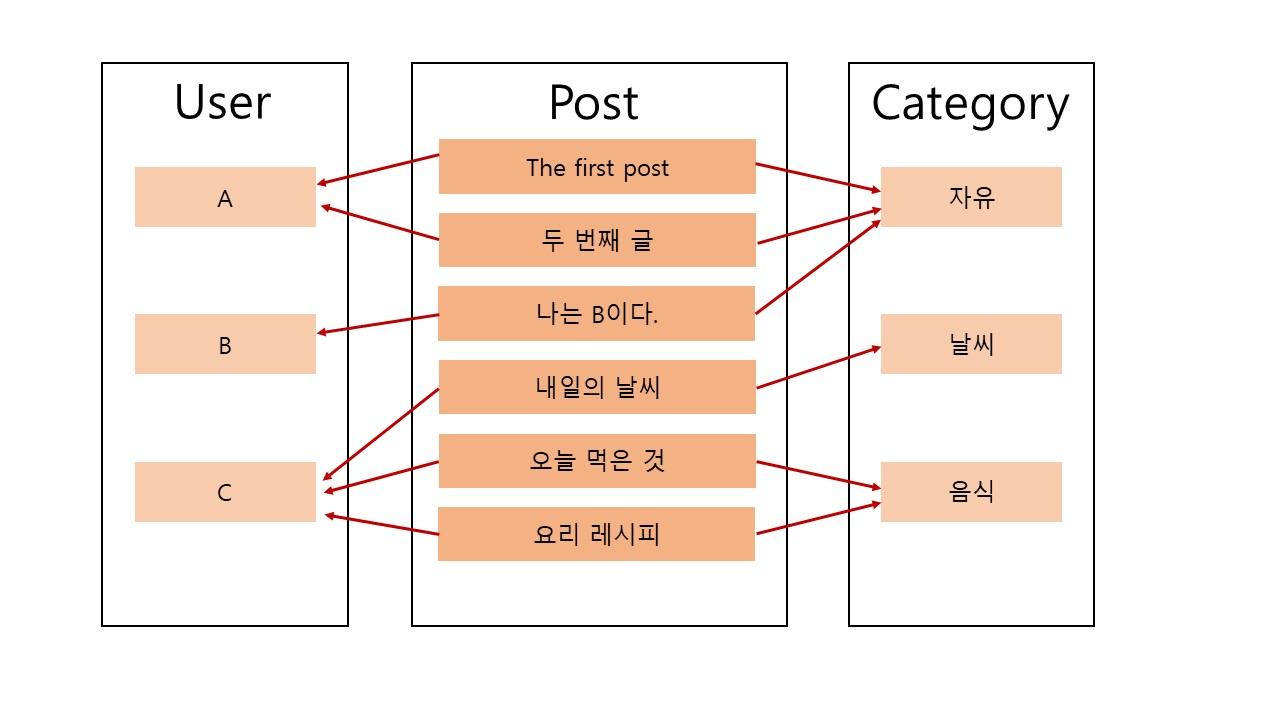

In [3]:
from IPython.core.display import Image, display,HTML
Image("images\many to one.jpg", width=800)

사용자로 등록된 A,B,C라는 사람이 있다. 이들은 각자 여러개의 포스트를 작성할 수 있고 이 정보를 담기 위해 Post모델에서 작성자의 정보를 담을 필드가 필요하다. 각 필드에는 하나의 사용자 정보만 담을 수 있다. 즉, 포스트와 작성자의 관계는 다대일이 된다. 포스트에 카테고리 정보를 추가하고 싶을 때도 마찬가지이다. 하나의 카테고리에는 여러개의 포스트가 포함될 수 있다. 자유 카테고리에는 3개의 글이 포함되어 있다. 역시 다대일관계가 성립한다.
### author 필드에는 어떤 내용이 필요할까?
이제 author 필드를 구현해보자. author 필드에는 어떤 내용을 담아야 할까? 먼저 사용자가 포스트를 작성했을 때 사용자명을 문자열로 저장해야한다. 또한 그 사용자의 명이 변경 되었을 때 이전에 작성한 글의 작성자명도 바뀌어야 하고, 탈퇴하거나 글을 삭제하면 작성자명을 'unknown'으로 표시하는 기능도 필요하다.  

작성자 정보를 담은 author필드에는 여러가지 기능이 필요하므로 따로 만든 다음 포스트와 연결하는것이 효율적이다. 작성자 정보 하나에 여러 포스트를 연걸하는 다대일 관계에는 ForeignKey를 활용하면 된다. 이번엔 ForeignKey가 무엇인지 알아보자.
### ForeignKey로 author 필드 구현하기
먼저 ForeighKey로 연결된 다른 모델의 레코드가 삭제되었을 때 함께 삭제되는 방식으로 author필드를 구현해보자.
#### (1) models.py에서 author필드 구현하기
User 모델을 사용해야 하므로 from django.contrib.auth.models 에서 import User 를 해준다. User는 장고에서 기본적으로 제공하는 모델이다.
on_delete=model.CASCADE 는 이 포스트의 작성자가 DB에서 삭제되면 이 포스트도 삭제한다는 의미이다. 마지막으로 작성자 정보까지 출력되도록 str함수도 수정한다.
#### (2) 마이그레이션하기
이제 models.py의 변경내용을 DB에 적용시킨다.메시지가 뜨는데 1번은 현재 author 필드가 비어있으므로 추가를 할것인지 2번은 일단 취소할것인지 고르라는 내용이다. 1번을 선택하고 마이그레이션을 실행한다. 그럼 이제 author 입력란이 생긴것을 알 수 있다.
#### (3) 다른 사용자가 게시물을 작성하는 경우 테스트
이제 다른 사용자가 게시물을 적는 경우를 테스트해보자. 관리자 페이지에서 새로운 사용자를 만들자. Users옆의 Add를  클릭하면된다.  
계정을 만들면 새로운 작성자명까지 잘 출력되는 것을 알 수있다.
#### (4) 작성자 정보를 삭제하면 포스트가 삭제되는지 확인
models에서 사용자 아이디가 삭제되면 포스트가 삭제되는지 설정하였다. 실제로 사용자를 없애면 포스트가 삭제된다.  
### 연결된 사용자가 삭제되면 빈칸으로 두기
이번엔 사용자가 삭제되어도 글은 남기고 author필드만 null로 바뀌도록 해보자.
#### (1) on_delete=models.SET_NULL 사용
models.py에서 코드를 수정한다. 작성자가 DB에서 삭제되었을 때 작성자명을 빈칸으로 둔다는 의미이다. 마이그레이션을 하면 오류가 뜨는데 null=True로 바꿔주면된다.  
#### (2) 포스트 작성자가 삭제되었을 때 테스트
새로운 user를 만들고 글을 쓴뒤 user를 삭제하여도 글이 그대로 남는것을 알 수 있다.
### 포스트 목록 페이지와 포스트 상세 페이지에 author 반영하기
작성자 정보가 포스트 목록 페이지와 상세 페이지에 나타나게 해보자.  
#### (1) 포스트 목록 페이지에 작성자 추가하기
테스트 주도개발 방식으로 해보자. setUp함수에 아래 두줄을 추가해주자.

In [4]:
self.user_trump=User.objects.create_user(username='trump',password='somepassword')
self.user_biden=User.objects.create_user(username='biden',password='somepassword')

NameError: name 'User' is not defined

그리고 test_post_list의 post_001, post_002레코드 생성 코드 안에 각 각 author=self.user_trump, author=self.user_biden을 추가한 후 제일 마지막에 test코드를 넣어준다.

In [6]:
self.assertIn(self.user_trump.username.upper(),main_area.text)
self.assertIn(self.user_biden.username.upper(),main_area.text)

NameError: name 'self' is not defined

아직 까지는 test를 하면 Fail 나온다. post_list.html에서 작성자명 쓸 위치에 {{p.author|upper}} 를 추가해주면 test가 OK라고 뜬다.
#### (2) 포스트 상세 페이지에도 작성자 추가하기
마찬갖기로 post_001에서 Post모델 레코드를 하나 생성할 때 작성자명을 포함하도록 수정해보자. 방법은 위와 같다. 마찬가지로 test OK라고 뜬다.
___

## 카테고리 기능 구현하기
포스트 내용에 따라 카테고리를 구분해서 방문자가 원하는 분야의 글을 읽을 수있게 만들어보자. 
### 카테고리 페이지 구상하기
카테고리 카드에는 블로그의 카테고리가 모두 표시되는데, 이들은 포스트 목록 페이지와 포스트 상세 페이지에 모두 나타나야한다. 이 중 하나를 클릭하면 해당 카테고리 페이지로 이동한다. 페이지에는 해당 카테고리에 들어 있는 포스트가 모두 나열된다. 포스트는 하나의 카테고리만 지정할 수 있따. 반대로 카테고리는 여러개의 포스트가 포함 될 수 있다. 즉, 다대일 관계이므로 ForeighKey로 구현하면된다. 직접 Category 모델을 만들어보자.
### 카테고리 모델 만들기
#### (1) models.py에 Category 모델 만들기
blog/models.py에서 Category 모델을 다음과 같이 주가해준다.

In [7]:
class Category(models.Model):
    name=models.CharField(max_length=50, unique=True)
    slug=models.SlugField(max_length=200, unique=True, allow_unicode=True)
    
    def __str__(self):
        return self.name

NameError: name 'models' is not defined

Category 모델에서는 name과 slug라는 필드를 새로만들었다. name 필드는 각 카테고리의 이름을 담는 필드로 CharField를 통해 만들었다. unique=True는 동일한 name을 갖는 카테고리를 만들 수 없게 설정하는 것이다. (이와 달리 Post 모델에서는 default값이 False이므로 같은 제목을 갖는 포스트를 만들 수 있다.)  

slug필드를 만들 때 사용한 SlugField란 사람이 읽을 수 있는 텍스트로 고유  URL을 만들고 싶을 때 사용한다. Category모델 역시 Post모델 처럼 pk를 활용해 URL을 만들 수 있지만, 카테고리는 포스트만큼 개수가 많지않고 사람이 읽고 그 뜻을 알 수 있게 고유 URL을 사용한다. 최대 길이는 200자로 하고 unique 역시 True로 설정해준다. 한글을 지원하지 않지만 allow_unicode=True로 설정하면 한글로 만들 수 있따.
#### (2) Post 모델에 category 필드 추가하기
Post 모델에 ForeignKey로 Category 필드를 추가한다. 카테고리가 미분류인 포스트도 있을 수 있으므로 null=True로 한다. 그리고 ForeignKey로 연결되어 있던 카테고리가 사겢된 경우 연결된 포스트까지 삭제하지 않고 해당 포스트이 category 필드만 null이 되도록 on_delete=models.SET_NULL로 설정한다.
#### (3) 마이그레이션 해준다.
#### (4) admin.py에 Category 모델 등록하기
blog/admin.py를 열어 Category모델을 import해준다. 그리고 새로운 class를 추가한다.

In [8]:
class CategoryAdmin(admin.ModelAdmin):
    prepopulated_fields={'slug':('name',)}

NameError: name 'admin' is not defined

이제 category모델에 name 필드 값이 입력되었을 때 자동으로 slug가 만들어진다. 관리자 페이지에 직접 보면 이해하기가 쉬워진다.
#### (5) Meta로 모델의 복수형 알려주기
Category의 복수형이 Categorys로 되어있다. Categories로 바꿔주자. models.py에 아래 코드를 추가한다.

In [9]:
class Meta:
        verbose_name_plural='Categories'

### 카테고리를 빈 칸으로 남겨두기
Categories에 Add를 누르면 카테고리를 만들 수 있다. Name 카테고리 이름을 입력하면 알아서 URL에 사용하기 적합한 문자들로 Slug를 채워준다.(CategoryAdmin 클래스의 역할)이제 작성한 post에 들어가서 카테고리 칸이 생긴걸 확인한다음 카테고리를 지정하지않고 save를 누르면 오류가 뜨는것을 볼 수 있다. Post모델의 category필들에 balnk=True를 추가해주자.  
### 셀플러스를 이용해 DB 살펴보기
#### (1) 장고 셸 이용하기
카테고리에 대한 이해를 돕기위해 장고 셸을 이용해 보자 그 전  임의로 개의 글과 3개의 카테고리를 만든 후 서버를 중단하고  
python manage.py shell 을입력 하면 장고 셸이 열린다.

In [14]:
>>> from blog.models import Post,Category
>>> Post.objects.count()
5
>>> Category.objects.count()
3

ModuleNotFoundError: No module named 'blog'

위와 같이 blog에서 만든 포스트와 카테고리의 개수를 확인할 수 있다. for문을 활용해 DB에 저장된 모든 Post레코드와 Category 레코드를 출력할 수도있다.

In [12]:
>>> for p in Post.objects.all():
...     print(p)
...
[1]첫번 째 포스트::qwon135@gmail.com
[3]스파이더맨::qwon135@gmail.com
[3]2021.11.03 일기::qwon135@gmail.com
[4]윈터솔져::qwon135@gmail.com
[5]5번째글::qwon135@gmail.com

>>> for c in Category.objects.all():
...     print(c)
...
일기
영화
자유주제

SyntaxError: invalid syntax (<ipython-input-12-2af94e3be22f>, line 4)

exit()를 입력하면 장고 셸에서 나올 수 있다.
#### (2) 셸 플러스 열기
셸 플러스를 사용하면 장고 셸보다 더 예쁘고 편리한 환경에서 사용할 수 있다. pip install django_extension과 pip install ipython을 설치해주자. 그리고 settings.py에   
INSTALLED_APPS에 django_extensions를 추가해주고 python manage.py shell_plus를 입력하면 셸 플러스가 실행된다. 셸 플러스를 이용하면 코드에 따라 색상이 다르게 표현되어 가독성이 높아지고 for문에 들여쓰기가 자동으로 맞춰진다. 또한 Post나 Category모델을 import하지않아도 바로 가져와 쓸 수 있다.  
#### (3) 포스트와 카테고리 목록 출력하기
셸 플러스로 DB를 살펴보자. 모든 포스트를 쿼리셋으로 받아온 후 for문으로 출력한다. 이 때 개별 포스트의 카테고리까지 출력 되게 하자. 카테고리 또한 DB에 존재하는 모든 카테코리를 가져와 출력한다.

In [17]:
for p in Post.objects.all():
   ...:     print(f'{p}::category - {p.category}')
   ...:
[1]첫번 째 포스트::qwon135@gmail.com::category - 자유주제
[3]스파이더맨::qwon135@gmail.com::category - 영화
[4]2021.11.03 일기::qwon135@gmail.com::category - None
[5]윈터솔져::qwon135@gmail.com::category - 영화
[6]6번째글::qwon135@gmail.com::category - None

SyntaxError: invalid syntax (<ipython-input-17-7bd88b434b31>, line 4)

In [18]:
for c in Category.objects.all():
   ...:     print(c)
일기
영화
자유주제

NameError: name 'Category' is not defined

이번엔 slug 필드 값이 '영화'인 카테고리를 가져와 category_movie 변수에 저장한후 name__startwith()='자유'로 name 필드값이 '자유'로 시작하는 카테고리를 가져와 category_free에 저장한다. 그럼 해당하는 카테고리를 가져온 것을 볼 수 있다.

In [19]:
In [6]: category_movie=Category.objects.get(slug='영화')

In [7]: category_movie
Out[7]: <Category: 영화>
        
In [9]: category_free=Category.objects.get(name__startswith='자유')

In [10]: category_free
Out[10]: <Category: 자유주제>

SyntaxError: invalid syntax (<ipython-input-19-c6cf4b3b01bb>, line 4)

각각 카테고리에 해당하는 포스트 목록을 출력해보자. category_movie.post_set.all()로 영화 레코드와 ForeignKey로 연결된 Post 레코드를 불러울 수있다. 이때 모델명을 소문자로 쓰고 뒤에는_set를 쓰는게 일반적이다. Post모델의 모델명이 Article이었다면 article_set이된다.

In [20]:
In [11]: for p in category_movie.post_set.all():
    ...:     print(p)
    ...:
[3]스파이더맨::qwon135@gmail.com
[5]윈터솔져::qwon135@gmail.com

SyntaxError: invalid syntax (<ipython-input-20-251d098d530c>, line 4)

### 포스트 목록 페이지 수정하기
#### (1) 페이지 모양 구상하기
Category 모델을 만들었으므로 사용자가 선택할 수 있게 해야한다. 먼저 포스트 목록 페이지의 구상을 해보자면 카테고리 카드를 오른쪽에 위치시키고 그안에 카테고리를 나열한 후, 각각의 카테고리 옆에는 해당 카테고리에 속한 포스트의 개수를 괄호안에 표시한다. 또한 포스트의 요약부분에도 카테고리를 뱃지모양으로 표시한다.
#### (2) 테스트 코드 작성하기
먼저 TestCase의 초기 DB를 정의 할 수 있는  setup함수에서

In [21]:
self.category_programming=Category.objects.create(name='programming',slug='programming')  
self.category_music=Category.objects.create(name='music',slug='music')  

NameError: name 'Category' is not defined

를 추가해줘서 카테고리를 만들어 준다. 또한 앞으로는 setUp함수에서 포스트를 만들고 시작할 수 있게 test_post_list의 post create함수들을 setUp함수로 옮겨와주자. 그리고 카테고리가 없는 post_003도 추가해주자.
#### (3) category_card_test() 함수 따로 만들기
이제 카테고리를 테스트할 함수를 만들어 주자. 카테고리는 포스트 목록 페이지나 상세페이지에 모두 사용되므로 따로 만들어 주는 것이 효율적이다.
카테고리 테스트는 id가 category-card인 div요소를 찾고 그 안에 Categories라는 문구가 있는지 그리고 모든 카테고리가 제대로 출력되어 있는지 확인한다. '카테고리가 없는 포스트 개수가'미분류' 항목 옆 괄호에 써 있는지도 확인한다.

In [23]:
    def category_card_test(self,soup):
        categories_card=soup.find('div',id='categories-card')
        self.assertIn('Categories',categories_card.text)
        self.assertIn(f'{self.category_programming.name}({self.category_programming.post_self.count()})',categories_card.text)
        self.assertIn(f'{self.category_music.name}({self.category_music.post_self.count()})',categories_card.text)
        self.assertIn(f'미분류 (1)',categories_card.text)

#### (4) test_post_list() 함수 대폭 수정 하기
앞의 내용을 모두 지우고 새로 작성한다. 포스트가 3개 있으므로 포스트가 있는 경우와 없는 경우로 나누어 테스트한다.

In [25]:
def test_post_list(self):
    # 포스트가 있는경우

    # 포스트가 3개인지?
    self.assertEqual(Post.objects.count(),3)

    # post_list 페이지 url을 get한 후 접속 테스트, html 피싱
    response=self.client.get('/blog/')
    self.assertEqual(response.status_code,200)
    soup=BeautifulSoup(response.content,'html.parser')

    # navbar, category 테스트
    self.navbar_test(soup)
    self.category_card_test(soup)

    # main-area 정의, 게시물이 있다면
    main_area=soup.find('div', id='main-area')
    self.assertNotIn('아직 게시물이 없습니다',main_area.text)

    # post test 
    post_001_card=main_area.find('div', id='post-1')
    self.assertIn(self.post_001.title, post_001_card.text)
    self.assertIn(self.post_001.category.name, post_001_card.text)

    post_002_card=main_area.find('div', id='post-2')
    self.assertIn(self.post_002.title, post_002_card.text)
    self.assertIn(self.post_002.category.name, post_002_card.text)

    post_003_card=main_area.find('div', id='post-3')
    self.assertIn('미분류', post_003_card.text)
    self.assertIn(self.post_003.category.name, post_003_card.text)        

    # author test
    self.assertIn(self.user_trump.username.upper(),main_area.text)
    self.assertIn(self.user_biden.username.upper(),main_area.text)


    # 포스트가 없는 경우
    Post.objects.all().delete()
    self.assertEqual(Post.objects.cout(), 0)
    response=self.client.get('/blog/')
    soup=BeautifulSoup(response.content,'html.parser')
    main_area=soup.find('div', id='main-area')
    self.assertIn('아직 게시물이 없습니다', main_area.text)

#### (5) div 요소에 id부여하기
아직 div 요소에 categories-card 라고 id를 부여하지 않았으므로 테스트 오류가 뜬다. base.html로 가서 카테고리의 div요소에 id를 추가해준다.
#### (6) get_context_data() 메서드로 category 관련 인자 넘기기
이제 다시 test를 해보면  

'programming(1)' not found in '\nCategories\n\n\n\nWeb Design\nHTML\nFreebies\n\n\n\n' 

라는 오류가 뜬다. 포스트 목록을 만드는 views.py에서 Category 레코드를 가져와 post+list.html에 반영을 해주어야한다.  
ListView나 DetailView 같은 클래스는 기본적으로 get_context_data 메서드를 내장하고 있다. 우리는 PostList로 ListView를 상송받아 model=Post라고 선언하면  
get_context_data에서 자동으로 post_list=Post.objects.all()을 명령한다. 그래서 post_list.html에서 for문을 활용할 수 있는 것이다. 여기서 get_context_data를 정의하여 오버라이딩한 다음 몇가지 정보를 추가해야 한다.  

views.py의 PostList 클래스에서 새로운 함수를 정의하여준다. 

In [26]:
# 매개변수는 dic의 key값들
def get_context_data(self, **kwargs):
    context=super(PostList,self).get_context_data()
    context['categories']=Category.objects.all()
    context['no_category_post_count']=Post.objects.filter(category=None).count()
    return context

먼저 context를 정의해주는데 super(PostList,self).get_context_data(), 즉 super 메서드를 이용해 기존의 get_context_data 함수의 기능을 새로만드는 자식 클래스로 상속시킨다. 그리고 원하는 쿼리셋을 만들어 dic형태로 context에담으면 된다. 두가지 정보를 담는데 하나는 Category.objects.all()로 모든 카테고리를 가져와 categories라는 변수에 담는다. 다른 하나는 카테고리가 지정되지 않는 포스트의 개수를 세라는 의미로 Post.objects.filtef(category=None).count()로 쿼리셋을 만들어 no_category_post_count에 담는다.
#### (7) 템플릿 수정하기
이제 base.html을 수정해보자. post_list.html은 카테고리 정보를 base.html에서 가져오기 때문이다.  
먼저 for문을 사용해 categories에서 불러온 요소를 li태그 목록 형태로 노출되게 한다. 그리고 a태그에 href에는 카테고리 고유링크를 만들어 놓고(Category모델에 url을 return해주는 함수 제작예정. 카테고리가 없어 미분류인 포스트의 개수도 나타나도록 한다. 이부분도 a태그로 감싸고 herf는 '/blog/category/no_cateogory'로 지정해준다. (이 부분은 나중에 카테고리 없는 포스트를 모아서 보여줄 개발 예정)

In [27]:
{% for category in categories %}
<li>
    <a href="{{category.get_absolute_url}}">{{category}}({{category.post_set.count}})</a>
</li>
{% endfor %}
<li>
    <a href="/blog/category/no_category/">미분류 ({{no_category_post_count}})</a>
</li>

SyntaxError: invalid syntax (<ipython-input-27-e62e9c76e4d9>, line 1)

여기서 test를 하면 post_001_card가 None이므로 Fail이 뜬다. 그러므로 post_list.html을 수정해줘야한다.  
for 문안에서 반복되는 요소에  id="post-{{p.pk}}" 라고 추가를 하면 'post-1' 같은 식으로 뜬다.  

다시 테스트를하면 programming이라는 문구가 없다고 뜬다. 부트스트랩의 badge를 사용해 글 오른쪽에 카테고리가 뜨게 해준다. 내용에는 {{p.category}}를 넣어준다.  

또 테스트를 해보면 미분류가 없다고 한다. if문을 써서 카테고리가 없으면 '미분류'라고 뜨게 수정한다.  

이제 테스트가 정상적으로 통과한다.
#### (8) 웹브라우저 직접 확인
서버를 실행하고 웹사이트를 확인해보자.

### 포스트 상세 페이지 수정하기
포스트 상세 페이지의 구현 내용도 포스트 목록 페이지와 비슷하다. 
#### (1) 테스트 코드 수정하기
test_post_detail 테스트 코드는 조금만 수정하면 된다. category_card_test함수를 추가해주고 post_001인 부분을 self.post_001로 바꿔주자.
#### (2) get_context_data() 메서드로 category 관련 인자 넘기기
앞에서와 마찬가지로 코드를 짜는데 super에서 postDetail 클래스로 상속하는것만 바꾸면된다.

In [28]:
class postDetail(DetailView):
    model=Post
    
    def get_context_data(self, **kwargs):
        context=super(postDetail,self).get_context_data()
        context['categories']=Category.objects.all()
        context['no_category_post_count']=Post.objects.filter(category=None).count()
        return context

NameError: name 'DetailView' is not defined

#### (3) 템플릿 수정하기
post_list의 코드를 그대로 가져와서 p => post로 수정해주면 이제 테스트는 모두 통과가된다.
### 카테고리 페이지만들기
페이지 옆 타이틀에 카테고리 이름을 뱃지로 표시에 어떤 카테고리 페이지인지 만들어보자.
#### (1) 테스트 코드 작성
카테고리 페이지에 구성하고 싶은 요소를 테스트할 test_category_page() 함수를 만들어보자.

In [30]:
def test_cateogory_page(self):
    # 1. 카테고리페이지 url get
    response=self.client.get(self.category_programming.get_absolute_url())
    self.assertEqual(response.status_code, 200)

    # 2. html 피싱, navbar,category card 테스트
    soup=BeautifulSoup(response.content, 'html.parser')
    self.navbar_test(soup)
    self.category_card_test(soup)

    # 3. h1태그에 카테고리 이름이 있는지 확인
    self.assertIn(self.category_programming.name, soup.h1.text)

    #4. main-area에 해당 카테고리의 이름은 존재하고 다른 카테고리의 이름은 없는지 test
    main_area=soup.find('div', id='main-area')
    self.assertIn(self.category_programming.name, main_area.text)
    self.assertIn(self.post_001.title, main_area.text)
    self.assertNotIn(self.post_002.title, main_area.text)
    self.assertNotIn(self.post_003.title, main_area.text)

#### code 해석
1. setUp에서 만든 programming 카테고리를 아용한다. 고유 URL을 갖도록 해주고 페이지가 잘열리는지 검사한다.
2. 성공적으로 읽어왔다면 HTML을 파싱하고 네비바, 카테고리카드를 검사한다.
3. 페이지 상단에 카테고리 뱃지가 잘 나타는지 확인한다. (이 페이지에는 h1를 한번만 사용할 예정)
4. 메인 영역에 해당 카테고리(여기서는 programming)이 있는지 확인하고 이 카테고리만 포스트에 있고 다른 카테고리는 없는지 확인한다.  

작성후 테스트해보면 아직 Category 모델의 get_absolute_url을 만들지 않았으므로 오류가 뜬다.
#### (2) Category 모델 수정하기
Category모델에서 get_absolute_url() 함수를 정의해주자. Post모델에서는 pk로 url을 정의해줬다면 Categroy의 경우는 slug를 사용해 직관적으로 해당 카테고리임을 알 수 있게 해주자. Category 클래스 아래에 하래 함수를 추가해주자.

In [32]:
def get_absolute_url(self):
    return f'/blog/category/{self.slug}/'

Category 모델에 URL을 정의해주고 return해주는 함수를 만들었으므로 urls.py를 수정해줘야한다.
#### (3) URL 정의하기
사용자가 category/ 뒤에 문자열이 붙는 URL을 입력하면 view.py에서 정의 할 category_page() 함수의 매개변수인 slug 인자를 넘겨주도록 했다.  
예를들어 사용자가 127.0.0.1:8000/blog/category/programming/ 을 입력하면 programming/만 뗴어 view.py의 category_page() 함수로 보내준다.  
urls.py의 urlpatterns에 아래코드를 추가해준다.

In [33]:
path('category/<str:slug>/',views.category_page),

NameError: name 'path' is not defined

#### (4) 뷰 수정하기
views.py에 FBV로 category_page()함수를 만든다.

In [34]:
def category_page(request, slug): # 1. 매개변수 설정
    category=Category.objects.get(slug=slug)

    return render(
        request,
        'blog/post_list.html', # 2. 템플릿은 포스트 목록 페이지 사용
        { #3. 딕셔너리 정의
            'post_list' : Post.objects.filter(category=category),
            'categories' : Category.objects.all(),
            'no_category_post_count' : Post.objects.filter(category=None).count(),
            'category' : category,
        }
    )

#### 코드 설명
1. 매개변수로는 FBV 방식에 꼭 필요한 request에 더해 slug 까지 설정한다. 그리고 URL에 추출하여 category_page()함수의 인자로 받은 slug와 동일한 slug를 갖는 카테고리를 불러오는 쿼리셋을 만들어 category 변수에 저장한다.
2. 템플릿은 post_list.html을 사용한다.
3. CBV에서는 PostList 클래스가 context(웹호출에 필요한 정보)를 주지만 post_list.html을 사용한 FBV 방식 이므로 정의한 부분을 딕셔너리 형태로 직접 정의한다.  
    3-1.  'post_list' : Post.objects.filter(category=category : 이 부분은 포스트 중 Category.objects.get(slug=slug)로 필터링한 카테고리만 가져오게 해준다.  
              (예를 들어 slug가 programming이라면 programming을 카테고리로 가지는 post만 가져오게 해준다.)
    3-2. 'categories' : Category.objects.all() : 이 부분은 페이지 위쪽의 카테고리 카드를 채워준다.
    3-3.  'no_category_post_count' : Post.objects.filter(category=None).count() : 이 부분은 카테고리 카드 맨 아래에 미분류 포스트와 그 개수를 알려준다.
    4-4.  'category' : category : 페이지 타이틀 옆에 카테고리 이름을 알려주는 역할을 할것이다.  
    
#### (5) 템플릿 수정하기
이제 post_list.html에 카테고리 페이지 일때만 카테고리가 뜨게 해준다. if문을 사용하고 h1 태그에 카테고리이름을 넣어주자.

    <h1>Blog
        {% if category %}
        <span class="badge bg-dark">{{ category }}</span>
        {% endif %}
    </h1>  
#### (6) 미분류 카테고리 처리하기
카테고리 중 미분류를 클릭하면 오류가 뜬다. 이 부분을 처리하려면 카테고리가 없는 포스트 목록이 나타나야 한다.  
blog/views.py에서 category_page()함수의 slug인자에 'no_category'가 넘어오는 경우 카테고리가 없는 포스트만 보여주고,  
category 변수에도 실제 Category 모델의 레코드가 아닌 '미분류'라는 문자열만 저장한다.

In [36]:
def category_page(request, slug): # 1. 매개변수 설정
    # 카테고리가없는경우
    if slug=='no_category':
        category='미분류'
        post_list=Post.objects.filter(category=None)
    else:
        category=Category.objects.get(slug=slug)
        post_list=Post.objects.filter(category=category)
    
    return render(
        request,
        'blog/post_list.html',  # 2. 템플릿은 포스트 목록 페이지 사용
        {#3. 딕셔너리 정의
        'post_list' : post_list,
        'categories' : Category.objects.all(),
        'no_category_post_count' : Post.objects.filter(category=None).count(),
        'category' : category,
        }
    )

조건문을 걸어 slug가 있을 때 없을때 변수를 각각 다르게 설정하여 수정해준다.